In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# Read the raw data from .csv into Python

salary_data = pd.read_csv('c:/users/bourb/datasets/employee_salaries.csv')

In [84]:
# Show first 3 rows of the DataFrame

salary_data.head(3)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.00,0.0,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.36,0.0,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.00,0.0,0.0,M3


In [85]:
# Find the row count (Number of Employees) in the DataFrame

len(salary_data)

10291

In [86]:
# Find column names, Non-Null value count, and datatype for each column in the DataFrame

salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [88]:
# Find the count of Null values in each column

salary_data.isna().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [89]:
# Fill the 33 Null values in the Grade column with the value 0 using the inplace argument to replace the original DataFrame

salary_data['Grade'].fillna(0, inplace=True)

In [90]:
# Confirm that our Null values have been replaced

salary_data.isna().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

In [70]:
# Find summary statistics for all numeric columns in the DataFrame (In this instance salary data)

salary_data.describe().round(2)

,Base_Salary,Overtime_Pay,Longevity_Pay
count,10291.00,10291.00,10291.00
mean,90312.17,8081.29,1533.88
std,31240.84,16491.83,3209.04
min,11147.24,0.00,0.00
25%,70023.00,0.00,0.00
50%,87328.00,258.42,0.00
75%,108084.00,9190.97,1225.68
max,292000.00,227428.99,20279.46


In [91]:
# Create a Pandas Series of values from the Gender column of the DataFrame

salary_data['Gender']

0        M
1        M
2        F
3        F
4        F
        ..
10286    M
10287    F
10288    F
10289    F
10290    F
Name: Gender, Length: 10291, dtype: object

In [92]:
# Find a count of each value within the Gender column of the DataFrame

salary_data['Gender'].value_counts()

Gender
M    5929
F    4362
Name: count, dtype: int64

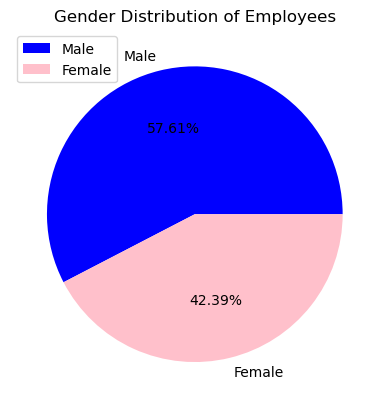

In [101]:
# Use plt.pie to create a pie chart with the gender distribution indicated above. Pass a labels, colors, and autopct argument 

plt.pie(salary_data['Gender'].value_counts(), labels=['Male', 'Female'], colors=['blue', 'pink'], autopct='%1.2f%%')

# Add a legend to the visualization using location and labels argument

plt.legend(loc='upper left', labels=['Male', 'Female'])

# Create a custom title for the visualization

plt.title("Gender Distribution of Employees")

# Show the visualization

plt.show()

In [112]:
# Create a dataset of the top 10 departments and their count of employees and save it to a variable

count_by_dep = salary_data['Department_Name'].value_counts().head(10)

In [113]:
# Show the dataset created above

count_by_dep

Department_Name
Department of Health and Human Services    1877
Department of Police                       1794
Fire and Rescue Services                   1440
Department of Transportation               1289
Correction and Rehabilitation               513
Alcohol Beverage Services                   462
Department of Public Libraries              427
Department of General Services              424
Department of Permitting Services           243
Department of Recreation                    193
Name: count, dtype: int64

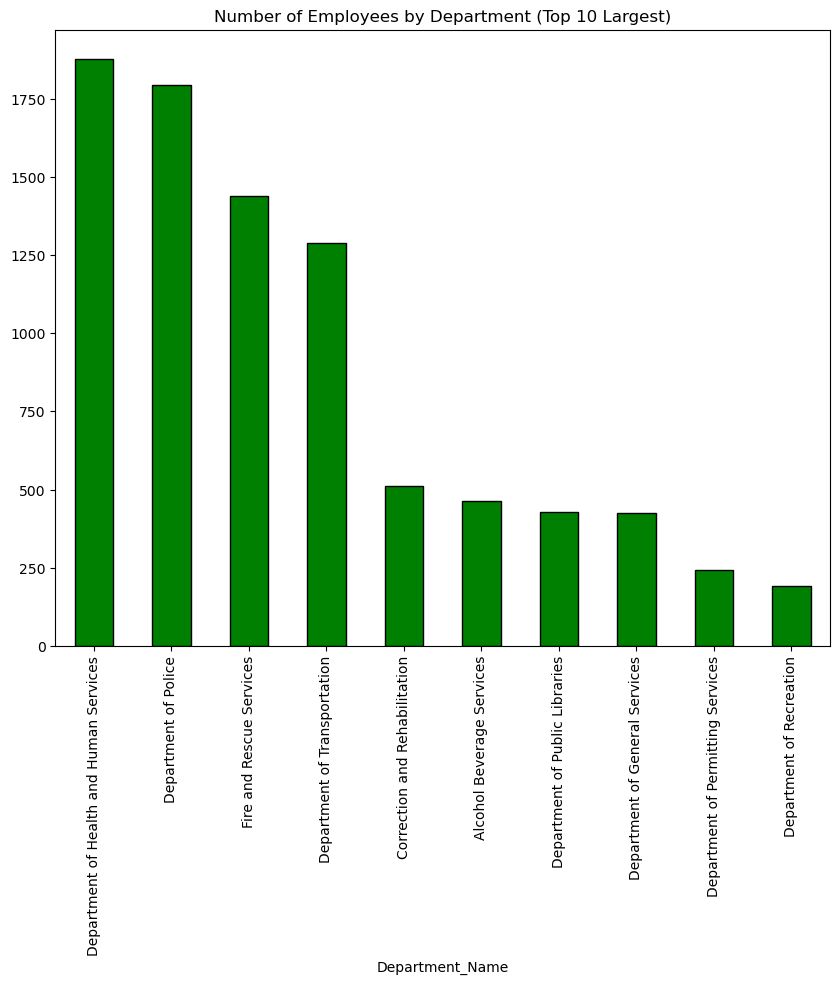

In [122]:
# Use our custom dataset created above and the .plot method to make a bar chart passing a custom size and edge color

count_by_dep.plot(kind='bar', figsize=(10,8), color='green', edgecolor='black')

# Create a custom title for our visualization

plt.title('Number of Employees by Department (Top 10 Largest)')

# Show our visualization

plt.show()

In [115]:
# Create a list of all unique department names in the department names column which we will later pass as tick values

dep_labels = list(salary_data['Department_Name'].unique())

In [116]:
# Create a group by department of base salaries within said department

dep_sal = salary_data.groupby('Department_Name')['Base_Salary']

# Find the average salary within each department and round that value to 2 decimal places saving it back to original variable

sal_by_dep = dep_sal.mean().round(2)

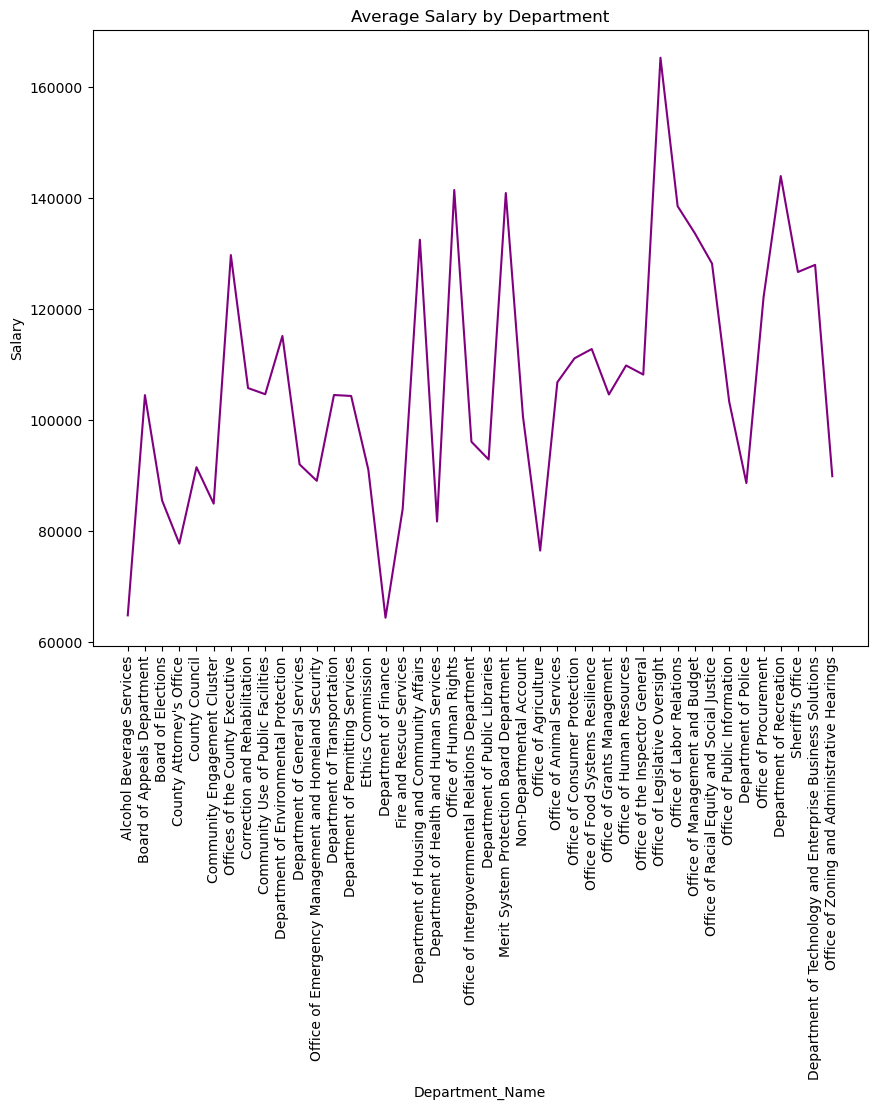

In [123]:
# Utilizes the default .plot type of a line chart to create a visualization of a custom size

sal_by_dep.plot(figsize=(10, 8), color='purple')

# Indicate the y axis label should be 'Salary'

plt.ylabel('Salary')

# Create custom x ticks by indicating the number, rotation, and the custom labels

plt.xticks(np.arange(len(dep_labels)), rotation=90, labels=dep_labels)

# Give the visualization a custom title

plt.title("Average Salary by Department")

# Show the visualization

plt.show()